In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:

# Pandas data frame
df = pd.read_csv("../results/bootstrap/gfastats.bootstrap.txt", sep = "\t")

In [133]:
seq_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Seq")][0]
seq_index

30

In [134]:
start_index = [i for i, x in enumerate(list(df.columns)) if x.startswith("Run")][0]+1
start_index

2

In [135]:
color = ["royalblue", "green", "tomato","gold"]

In [136]:
df

,Size,Run,Node:1,Node:2,Node:3,Node:4,Node:5,Node:6,Node:7,Node:8,...,Seq:20,Seq:21,Seq:22,Seq:23,Seq:24,Seq:25,Seq:26,Seq:27,Seq:28,Unnamed: 58
0,2,0,4014384,7097510,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,3827909,7165869,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2684559,7871630,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,3,2960585,7706408,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,4,3624124,7415788,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,27,16,3091642,1293460,742465.0,555332.0,437401.0,352220.0,309305.0,293455.0,...,2077056.0,2172753.0,2260429.0,2580966.0,3226275.0,4364031.0,7086736.0,77019984.0,NaN,NaN
517,27,17,3071430,1288474,753842.0,559879.0,426110.0,351643.0,316101.0,290961.0,...,1976867.0,2101066.0,2295325.0,2605881.0,3163970.0,4362283.0,7044008.0,77043567.0,NaN,NaN
518,27,18,3033487,1295493,744109.0,559102.0,431780.0,353395.0,312356.0,289998.0,...,2055512.0,2162032.0,2215008.0,2639387.0,3130814.0,4390125.0,7019878.0,77112151.0,NaN,NaN
519,27,19,3098388,1257261,759489.0,556361.0,433063.0,337984.0,312443.0,287239.0,...,1988823.0,2090985.0,2341060.0,2580374.0,3208922.0,4329646.0,7158524.0,77085907.0,NaN,NaN


In [137]:
seq_soft = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][1:-1]), axis = 1)
seq_core = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][-1], axis = 1)
seq_priv = df.apply(lambda x: [x for x in x.iloc[seq_index:].values if not np.isnan(x)][0], axis = 1)
seq_pan = df.apply(lambda x: sum([x for x in x.iloc[seq_index:].values if not np.isnan(x)][:]), axis = 1)


In [138]:
seq_core

0       99915135.0
1      101216837.0
2      105974686.0
3      104312988.0
4      102563378.0
          ...     
516     77019984.0
517     77043567.0
518     77112151.0
519     77085907.0
520     76888804.0
Length: 521, dtype: float64

In [139]:
seq_soft = seq_soft/1000000
seq_core = seq_core/1000000
seq_priv = seq_priv/1000000
seq_pan = seq_pan/1000000

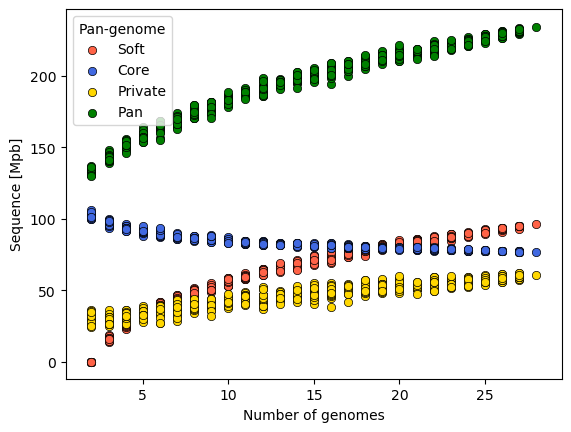

In [140]:
plt.scatter(df["Size"], seq_soft, color = color[2], edgecolor = "black", linewidth = 0.5, label = "Soft")
plt.scatter(df["Size"], seq_core, color = color[0], edgecolor = "black", linewidth = 0.5, label = "Core")

plt.scatter(df["Size"], seq_priv, color = color[3], edgecolor = "black", linewidth = 0.5, label = "Private")
plt.scatter(df["Size"], seq_pan, color = color[1], edgecolor = "black", linewidth = 0.5, label = "Pan")
legend = plt.legend()
legend.set_title("Pan-genome")
plt.xlabel("Number of genomes")
plt.ylabel("Sequence [Mpb]")
plt.savefig("plots/saturation/pie.acc.seq.png", dpi = 400)
plt.savefig("plots/saturation/pie.acc.seq.svg", dpi = 400)

In [141]:
node_soft = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][1:-1]), axis = 1)
node_core = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][-1], axis = 1)
node_priv = df.apply(lambda x: [x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][0], axis = 1)
node_pan = df.apply(lambda x: sum([x for x in x.iloc[start_index:seq_index].values if not np.isnan(x)][:]), axis = 1)

In [142]:
node_soft = node_soft/1000000
node_core = node_core/1000000
node_priv = node_priv/1000000
node_pan = node_pan/1000000

In [ ]:
plt.scatter(df["Size"], node_soft, color = color[2], edgecolor = "black", linewidth = 0.5, label = "Soft")
plt.scatter(df["Size"], node_core, color = color[0], edgecolor = "black", linewidth = 0.5, label = "Core")

plt.scatter(df["Size"], node_priv, color = color[3], edgecolor = "black", linewidth = 0.5, label = "Private")
plt.scatter(df["Size"], node_pan, color = color[1], edgecolor = "black", linewidth = 0.5, label = "Pan")
legend = plt.legend()
legend.set_title("Pan-genome")
plt.xlabel("Number of genomes")
plt.ylabel("#Node [in million]")
plt.savefig("plots/saturation/pie.acc.node.png", dpi = 400)
plt.savefig("plots/saturation/pie.acc.node.svg", dpi = 400)